**_______________________________________________________________________________________**<br>
<br>
**A2: Regression Model Development (Individual)**<br>
<br>
**DAT-5303 | Machine Learning**<br>
**_______________________________________________________________________________________**<br>

**Purvesh Chitre**<br>
**_______________________________________________________________________________________**<br>
**_______________________________________________________________________________________**<br>

**Importing Libraries required**

Here I started with importing the required libraries like pandas for data science visualization, matplotlib and seaborn for data visualization and enhanced data visualization, Statsmodels for regression modeling, numpy for mathematical applications. These are relatively basic libraries I imported first to get started.
Then I specifically imported certain models and modules from larger libraries so as to not slowdown any program processing speeds.
Here I started importing train-test split, cross validation, standard scalar, pipeline, standard scalar and randomized search to further improve the modeling of data to work with Linear Regression and other machine learning models from sklearn like Decision Tree, random forest and Gradient Boost regressor for understanding the impact of certain independent variables from the available dataset of Apprentice_Chef_Dataset on the Revenue or log_Revenue.

In [1]:
# importing libraries

import pandas                      as pd               # data science essentials
import matplotlib.pyplot           as plt              # data visualization
import seaborn                     as sns              # enhanced data visualization
import statsmodels.formula.api     as smf              # regression modeling
import numpy                       as np               # mathematical essentials

from   sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model                            # linear modeling in scikit-learn
from   sklearn.model_selection import cross_val_score  # cross-validation
from   sklearn.preprocessing   import StandardScaler   # standard scalar
from   sklearn.pipeline        import Pipeline         # pipeline
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning

# importing machine learning models

from sklearn.tree     import DecisionTreeRegressor     # regression trees
from sklearn.ensemble import RandomForestRegressor     # random forest
from sklearn.ensemble import GradientBoostingRegressor # gbm

# read / loading data

Apprentice_Chef_Data = pd.read_excel('./Apprentice_Chef_Dataset_2023.xlsx')


# log transforming REVENUE and saving it to the dataset

Apprentice_Chef_Data['log_REVENUE'] = np.log(Apprentice_Chef_Data['REVENUE'])


__________________________
**Exploring the dataset**
__________________________

Here I eplore the data from the dataset to understand what it is made up of, int, float or strings so that I can understand what I can use for getting correlations or regression or to feature engineer new parameters to understand the relation and impact on the dependent variable and to understand and later establish what are the independent variables.

In [2]:
# exploring the data with info

Apprentice_Chef_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   NAME                         1946 non-null   object 
 2   EMAIL                        1946 non-null   object 
 3   FIRST_NAME                   1946 non-null   object 
 4   FAMILY_NAME                  1900 non-null   object 
 5   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 6   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 7   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 8   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 9   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 10  CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 11  PC_LOGINS                    1946 non-null   int64  
 12  MOBILE_LOGINS                1946 non-null   int64  
 13  WEEKLY_PLAN       

In [42]:
# Checking the data with describe function

Apprentice_Chef_Data.describe().round(decimals = 2)

,revenue,total_meals_ordered,unique_meals_purch,contacts_w_customer_service,product_categories_viewed,avg_time_per_site_visit,cancellations_after_noon,pc_logins,mobile_logins,weekly_plans,...,avg_time_per_site_visit_x_pc_logins,avg_time_per_site_visit_x_total_meals_ordered,log_total_meals_ordered,domain_junk,domain_personal,domain_professional,frequent_orderer,log_avg_prep_vid_time,log_avg_mean_rating,cautious_expermienter
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,...,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,74.63,6.98,4.9,5.38,150.56,1.57,5.52,1.48,11.33,...,830.79,12588.40,4.07,0.2,0.44,0.36,192.22,4.48,1.25,125.52
std,1138.29,55.31,2.28,2.5,3.04,49.45,1.61,0.58,0.53,13.57,...,288.98,13157.23,0.73,0.4,0.50,0.48,204.79,0.50,0.18,177.54
min,131.00,11.00,1.00,1.0,1.00,33.40,0.00,4.00,0.00,0.00,...,167.00,467.60,2.40,0.0,0.00,0.00,17.00,2.34,0.27,6.00
25%,1350.00,39.00,5.00,3.0,3.00,114.40,0.00,5.00,1.00,1.00,...,624.25,4884.08,3.66,0.0,0.00,0.00,61.00,4.28,1.15,23.00
50%,1740.00,60.00,7.00,5.0,5.00,145.60,1.00,6.00,1.00,7.00,...,797.20,8773.70,4.09,0.0,0.00,0.00,110.00,4.54,1.23,30.00
75%,2670.00,95.00,8.00,7.0,8.00,173.78,2.00,6.00,2.00,13.00,...,984.50,15868.65,4.55,0.0,1.00,1.00,260.00,4.76,1.37,186.00
max,8793.75,493.00,18.00,19.0,10.00,564.20,13.00,7.00,3.00,52.00,...,2821.00,133405.60,6.20,1.0,1.00,1.00,1675.00,7.41,1.61,1616.00


Understanding the data in the columns for Engineering new parameters.<br>

#### Interval/Count data
-------------------
unique_meals_purch<br>
contacts_w_customer_service<br>
product_categories_viewed<br>
cancellations_after_noon<br>
pc_logins<br>
mobile_logins<br>
weekly_plans<br>
late_deliveries<br>
total_photos_viewed<br>
total_meals_ordered<br>

#### Continuous data
-------------------
avg_time_per_site_visit<br>
avg_prep_vid_time<br>
avg_meals_per_customer<br>
revenue<br>
avg_mean_rating<br>

#### Categorical
-------------------
name<br>
email<br>
first_name<br>
family_name<br>
<br>

In [4]:
# Taking the Apprentice_Chef_Data dataset and then transforming it into 
# boolean based on if a value is null and then summing together the 
# results per column

Apprentice_Chef_Data.isnull().sum()

REVENUE                         0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    46
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
CANCELLATIONS_AFTER_NOON        0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
LATE_DELIVERIES                 0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
AVG_MEAN_RATING                 0
TOTAL_PHOTOS_VIEWED             0
log_REVENUE                     0
dtype: int64

We were informed about the misspelled column 'LARGEST_ORDER_SIZE' and were told that it was to be named 'avg_meals_per_customer'. While doing this, due to personal taste, I changed all column names to lowercase thus using the rename() function.
Another error occured while renaming the columns with the column of 'LATE_DELIVERIES ', which had an extra space at the end.

In [5]:
# Replacing names and making the columns easier to read and type.
# Replacing the mislabled column of 'LARGEST_ORDER_SIZE' to 'avg_meals_per_customer'

Apprentice_Chef_Data.rename(columns = {'LATE_DELIVERIES ':'late_deliveries', 
                                       'NAME':'name','REVENUE':'revenue',
                                       'EMAIL':'email', 'FIRST_NAME':'first_name',
                                       'FAMILY_NAME':'family_name', 
                                       'TOTAL_MEALS_ORDERED':'total_meals_ordered', 
                                       'UNIQUE_MEALS_PURCH':'unique_meals_purch', 
                                       'CONTACTS_W_CUSTOMER_SERVICE':'contacts_w_customer_service', 
                                       'PRODUCT_CATEGORIES_VIEWED': 'product_categories_viewed', 
                                       'AVG_TIME_PER_SITE_VISIT':'avg_time_per_site_visit', 
                                       'CANCELLATIONS_AFTER_NOON':'cancellations_after_noon', 
                                       'PC_LOGINS':'pc_logins', 'MOBILE_LOGINS':'mobile_logins', 
                                       'WEEKLY_PLAN':'weekly_plans', 'LATE_DELIVERIES':'late_deliveries', 
                                       'AVG_PREP_VID_TIME':'avg_prep_vid_time', 
                                       'LARGEST_ORDER_SIZE':'avg_meals_per_customer', 
                                       'AVG_MEAN_RATING':'avg_mean_rating',
                                       'TOTAL_PHOTOS_VIEWED':'total_photos_viewed', 
                                       'log_REVENUE':'log_revenue'}, inplace = True)


In [43]:
# Rechecking the dataset if the names are being implemented correctly.

Apprentice_Chef_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   revenue                                        1946 non-null   float64
 1   name                                           1946 non-null   object 
 2   email                                          1946 non-null   object 
 3   first_name                                     1946 non-null   object 
 4   family_name                                    1900 non-null   object 
 5   total_meals_ordered                            1946 non-null   int64  
 6   unique_meals_purch                             1946 non-null   int64  
 7   contacts_w_customer_service                    1946 non-null   int64  
 8   product_categories_viewed                      1946 non-null   int64  
 9   avg_time_per_site_visit                        1946 

In [44]:
# Rechecking the dataset with limiting to just 5 rows

Apprentice_Chef_Data.head(n = 5)

,revenue,name,email,first_name,family_name,total_meals_ordered,unique_meals_purch,contacts_w_customer_service,product_categories_viewed,avg_time_per_site_visit,...,avg_time_per_site_visit_x_pc_logins,avg_time_per_site_visit_x_total_meals_ordered,log_total_meals_ordered,domain_junk,domain_personal,domain_professional,frequent_orderer,log_avg_prep_vid_time,log_avg_mean_rating,cautious_expermienter
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,...,1328.0,130940.8,6.200509,0,1,0,955,4.922969,1.062894,475
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,...,1235.0,89167.0,5.888878,0,0,1,1046,4.789157,0.967584,695
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,...,986.4,45703.2,5.627621,0,1,0,426,4.844187,1.304056,155
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,...,880.0,47344.0,5.594711,0,1,0,693,4.865841,1.149906,428
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,...,987.6,45429.6,5.620401,0,0,1,453,3.538638,1.149906,191


To understand further on the available dataset on the impact of certain variables from the original list we observed irrespective of continuous or count/interval data type, I tried to examine them through visualization tools by use of scatter plots.
We gave them all various colors to make them more interesting and capture attention.
the dependent variable taken here is revenue and not log_revenue. WHile the independent variables taken are: total_meals_ordered, avg_time_per_site_visit, weekly_plans, avg_prep_vid_time, avg_meals_per_customer, avg_meals_per_customer, avg_mean_rating, product_categories_viewed, cancellations_after_noon, late_deliveries.

/var/folders/5t/3hyc_jv11vzdszkpg_b7yhqm0000gn/T/ipykernel_16811/238509414.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


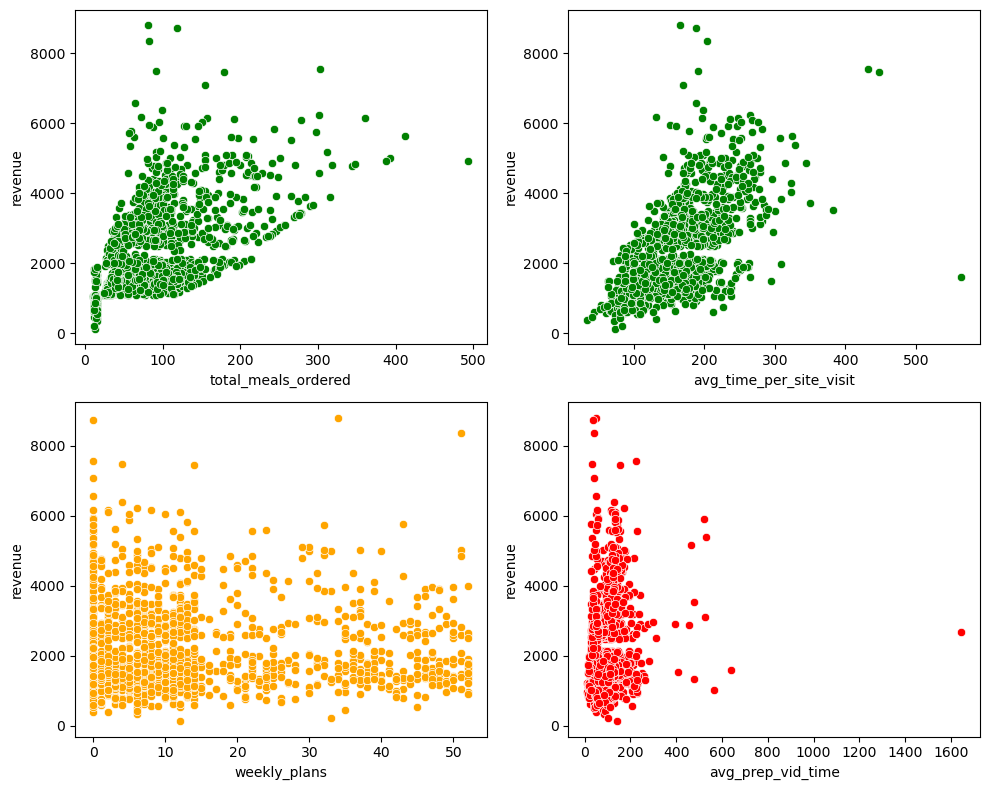

/var/folders/5t/3hyc_jv11vzdszkpg_b7yhqm0000gn/T/ipykernel_16811/238509414.py:78: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 1)


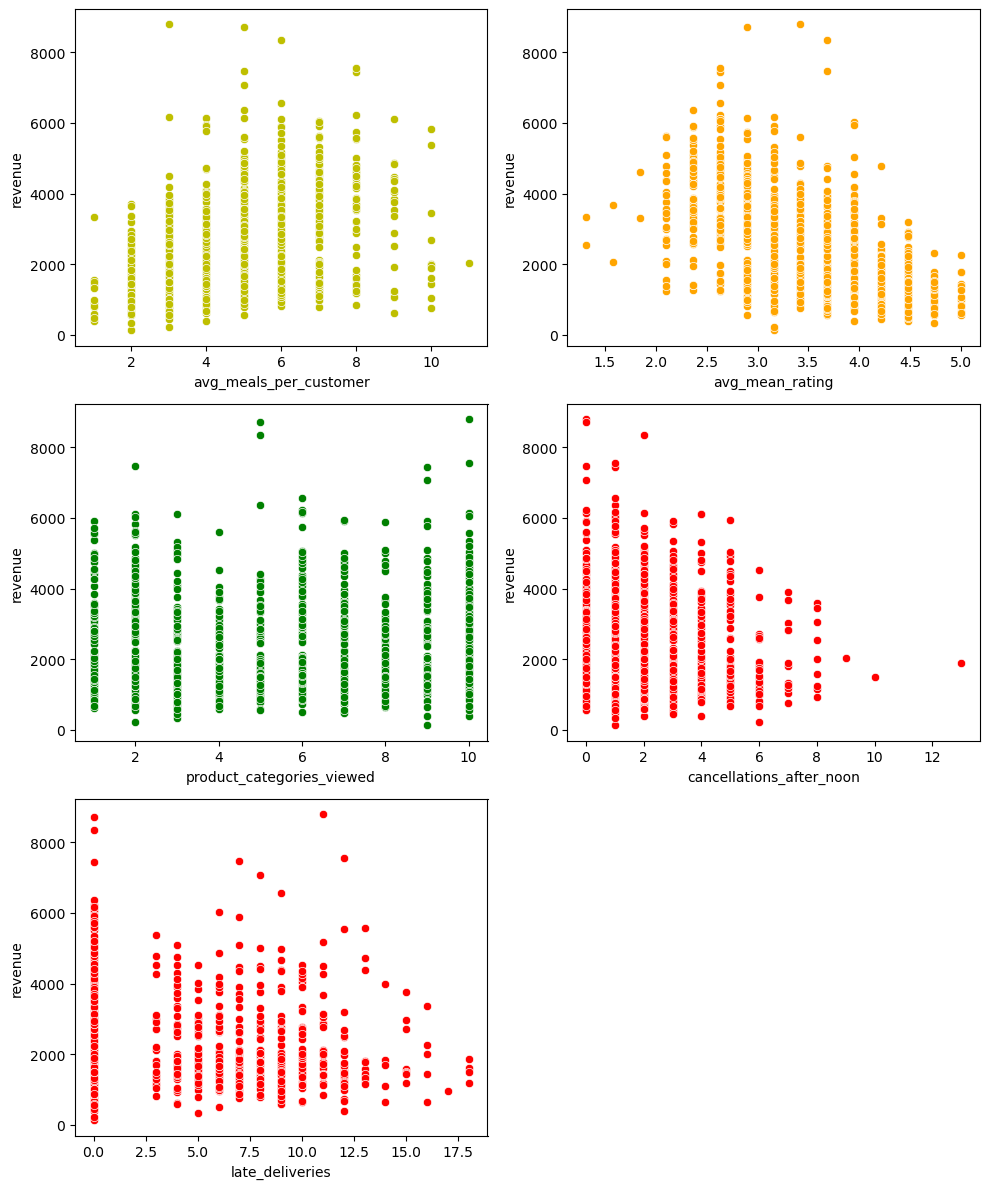

In [8]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = Apprentice_Chef_Data['total_meals_ordered'],
                y = Apprentice_Chef_Data['revenue'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'total_meals_ordered')
plt.ylabel(ylabel = 'revenue')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = Apprentice_Chef_Data['avg_time_per_site_visit'],
                y = Apprentice_Chef_Data['revenue'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'avg_time_per_site_visit')
plt.ylabel(ylabel = 'revenue')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = Apprentice_Chef_Data['weekly_plans'],
                y = Apprentice_Chef_Data['revenue'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'weekly_plans')
plt.ylabel(ylabel = 'revenue')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = Apprentice_Chef_Data['avg_prep_vid_time'],
                y = Apprentice_Chef_Data['revenue'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'avg_prep_vid_time')
plt.ylabel(ylabel = 'revenue')


# cleaning up the layout, and displaying the results
plt.tight_layout()
plt.show()


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = Apprentice_Chef_Data['avg_meals_per_customer'],
                y = Apprentice_Chef_Data['revenue'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'avg_meals_per_customer')
plt.ylabel(ylabel = 'revenue')


########################


# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = Apprentice_Chef_Data['avg_mean_rating'],
                y = Apprentice_Chef_Data['revenue'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'avg_mean_rating')
plt.ylabel(ylabel = 'revenue')


########################


# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = Apprentice_Chef_Data['product_categories_viewed'],
                y = Apprentice_Chef_Data['revenue'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'product_categories_viewed')
plt.ylabel(ylabel = 'revenue')


########################


# developing a scatterplot
plt.subplot(3, 2, 4)
sns.scatterplot(x = Apprentice_Chef_Data['cancellations_after_noon'],
                y = Apprentice_Chef_Data['revenue'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'cancellations_after_noon')
plt.ylabel(ylabel = 'revenue')


########################


# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = Apprentice_Chef_Data['late_deliveries'],
                y = Apprentice_Chef_Data['revenue'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'late_deliveries')
plt.ylabel(ylabel = 'revenue')


# cleaning up the layout, and displaying the results
plt.tight_layout()
plt.show()

From the above scatter plots we can observe various individual parameters impacting and relating with revenue.
Lets start with scatter plot 1 of total meals ordered and revenue and we can see that they are more concentrated than showing a complete linear growth. This still shows some level of understanding that the more the orders are the higher the revenue grows.
In the 2nd scatter plot we see average time per site visit and revenue. And this is more linear to me in the way that it is showing higher revenue for longer site visit.
In the 3rd scatter plot we see that week plans are not attractive to the customers as the lower the weekly meal plan the revenue is higher and this is clearly a count data.
In the 4th scatter plot we see that the shorter the video prep time the more the revenue, this means that customers are interested in products that have shorter video time to make than longer ones and the shorter video are likely more popular resulting in a stronger impact on revenue.
The 5th scatter plot is again confirmative of avg_meals_per_customer being a count data. The second observation based on the scatter plot is that there is an initial growth in number of orders from same customers but the frequency keeps going down with more orders and the revenue is thus also shrinking with either highly frequent customers or that the customers who are ordering more often are getting low in numbers.
With the 6th scatter plot I was trying to understand if higher the rating was higher the revenue or not.
With the 7th, 8th and 9th scatter plots, I was basically trying to figure out if the parameters were truly count type. 

______________________________________________________________________________________________

**Creating the list of response variables**<br>


I basically created the above 2 types of datapoints to understand if having higher engagement time with videos and website is related to customer is someone who cooks.

In [9]:
# creating placeholder variables
Apprentice_Chef_Data['customer_engg_vid']  = 0  # customer_engagement_videos
Apprentice_Chef_Data['customer_engg_site'] = 0  # customer_engagement_website

for index, minutes in Apprentice_Chef_Data.iterrows():
    if Apprentice_Chef_Data.loc[index, 'avg_prep_vid_time'] > 99: 
        Apprentice_Chef_Data.loc[index, 'customer_engg_vid'] = 1
    
    if Apprentice_Chef_Data.loc[index, 'avg_time_per_site_visit'] > 150:
        Apprentice_Chef_Data.loc[index, 'customer_engg_site'] = 1
        

With the earlier 2 datapoints created, I considered them as a score and added them to create my first engineered feature to understand if the customer who watches more than average and views the website more than the average is a person who cooks.

In [10]:
# creating engineered feature 1

Apprentice_Chef_Data['customer_cooks'] = Apprentice_Chef_Data['customer_engg_vid'] + Apprentice_Chef_Data['customer_engg_site']

Here I created the 2nd engineered feature of a customer's average site visit and mobile logins. With this ratio, I tried to understand the R^2 impact on our dependent variable of log_revenue. We do see about 41% R^2 which is not strong alone but maybe can impact when taken into consideration other variables.

In [45]:
# feature engineering 2

# create the interaction term
Apprentice_Chef_Data['avg_time_per_site_visit_x_mobile_logins'] = Apprentice_Chef_Data['avg_time_per_site_visit'] * Apprentice_Chef_Data['mobile_logins']

# log transform the variable
Apprentice_Chef_Data['log_avg_time_per_site_visit'] = np.log(Apprentice_Chef_Data['avg_time_per_site_visit'])

# create the X and y arrays
X = Apprentice_Chef_Data[['avg_time_per_site_visit', 'mobile_logins', 'avg_time_per_site_visit_x_mobile_logins', 'log_avg_time_per_site_visit']]
y = Apprentice_Chef_Data['log_revenue']

# create the linear regression model
model = sklearn.linear_model.LinearRegression()

# use cross-validation to evaluate the model
scores = cross_val_score(model, X, y, cv=5)

# calculate the average R^2 score
average_r2_score = np.mean(scores)

print("Average R^2 score:", average_r2_score)

Average R^2 score: 0.4127038945227196


Here I created the 3rd engineered feature of a customer's average site visit and pc logins. With this ratio, I tried to understand the R^2 impact on our dependent variable of log_revenue. We do see about 41% R^2 which is not strong alone but maybe can impact when taken into consideration other variables just like the earlier test.

In [46]:
# feature engineering 3

# create the interaction term
Apprentice_Chef_Data['avg_time_per_site_visit_x_pc_logins'] = Apprentice_Chef_Data['avg_time_per_site_visit'] * Apprentice_Chef_Data['pc_logins']

# log transform the variable
Apprentice_Chef_Data['log_avg_time_per_site_visit'] = np.log(Apprentice_Chef_Data['avg_time_per_site_visit'])

# create the X and y arrays
X = Apprentice_Chef_Data[['avg_time_per_site_visit', 'pc_logins', 'avg_time_per_site_visit_x_mobile_logins', 'log_avg_time_per_site_visit']]
y = Apprentice_Chef_Data['log_revenue']

# create the linear regression model
model = sklearn.linear_model.LinearRegression()

# use cross-validation to evaluate the model
scores = cross_val_score(model, X, y, cv=5)

# calculate the average R^2 score
average_r2_score = np.mean(scores)

print("Average R^2 score:", average_r2_score)

Average R^2 score: 0.4118386660904047


Here I created the 4th engineered feature of a customer's average site visit and pc logins. With this ratio, I tried to understand the R^2 impact on our dependent variable of log_revenue. We do see about 57.78% R^2 which is relatively strong alone but maybe can impact even more when taken into consideration other variables just like the earlier test.

In [47]:
# feature engineering 4

# create the interaction term
Apprentice_Chef_Data['avg_time_per_site_visit_x_total_meals_ordered'] = Apprentice_Chef_Data['avg_time_per_site_visit'] * Apprentice_Chef_Data['total_meals_ordered']

# log transform the variables
Apprentice_Chef_Data['log_avg_time_per_site_visit'] = np.log(Apprentice_Chef_Data['avg_time_per_site_visit'])
Apprentice_Chef_Data['log_total_meals_ordered'] = np.log(Apprentice_Chef_Data['total_meals_ordered'])

# create the X and y arrays
X = Apprentice_Chef_Data[['avg_time_per_site_visit', 'total_meals_ordered', 'avg_time_per_site_visit_x_total_meals_ordered', 'log_avg_time_per_site_visit', 'log_total_meals_ordered']]
y = Apprentice_Chef_Data['log_revenue']

# create the linear regression model with feature scaling and log transformations
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reg', sklearn.linear_model.LinearRegression())])

# use cross-validation to evaluate the model
scores = cross_val_score(pipe, X, y, cv=5)

# calculate the average R^2 score
average_r2_score = np.mean(scores)

print("Average R^2 score:", average_r2_score)

Average R^2 score: 0.5778508460249978


With the information given from the Apprentice_Chef case pdf document, we found out the way the company categoriezes its customers based on the customer's email id.
We were told that emails ending with,['mmm.com', 'amex.com', 'apple.com', 'boeing.com', 'caterpillar.com', 'chevron.com', 'cisco.com', 'cocacola.com', 'disney.com', 'dupont.com', 'exxon.com', 'ge.org', 'goldmansacs.com', 'homedepot.com', 'ibm.com', 'intel.com', 'jnj.com', 'jpmorgan.com', 'mcdonalds.com', 'merck.com', 'microsoft.com', 'nike.com', 'pfizer.com', 'pg.com', 'travelers.com', 'unitedtech.com', 'unitedhealth.com', 'verizon.com', 'visa.com', 'walmart.com'] are to be classified under professional domain category. Emails ending with ['gmail.com', 'yahoo.com', 'protonmail.com'] are to be categorized in personal domain category. And emails ending with ['me.com', 'aol.com', 'hotmail.com', 'live.com', 'msn.com', 'passport.com'] to be classified in junk domain category.
To do this I used the above code to get new columns set up with the dummy variables marking it up as 1 where the customer emails show up in the said column. This is likely to help with regression to understand if certain email categories have an impact on the revenue or not. While also giving us a count of the type of customers we have in the respective domain categories. Helping to create 3 engineered features.

In [14]:
# feature engineering 5

# professional domain customer emails

professional = ['mmm.com', 'amex.com', 'apple.com', 'boeing.com', 
                'caterpillar.com', 'chevron.com', 'cisco.com',
                'cocacola.com', 'disney.com', 'dupont.com', 
                'exxon.com', 'ge.org', 'goldmansacs.com', 'homedepot.com',
                'ibm.com', 'intel.com', 'jnj.com', 'jpmorgan.com', 
                'mcdonalds.com', 'merck.com', 'microsoft.com',
                'nike.com', 'pfizer.com', 'pg.com', 'travelers.com', 
                'unitedtech.com', 'unitedhealth.com',
                'verizon.com', 'visa.com', 'walmart.com']


# personal domain customer emails

personal     = ['gmail.com', 'yahoo.com', 'protonmail.com']


# junk domain customer emails

junk         = ['me.com', 'aol.com', 'hotmail.com', 'live.com', 
                'msn.com', 'passport.com']


# creating columns of each domain 

Apprentice_Chef_Data['domain'] = 'other'
Apprentice_Chef_Data.loc[Apprentice_Chef_Data['email'].str.endswith(tuple(professional)), 'domain'] = 'professional'
Apprentice_Chef_Data.loc[Apprentice_Chef_Data['email'].str.endswith(tuple(personal)), 'domain'] = 'personal'
Apprentice_Chef_Data.loc[Apprentice_Chef_Data['email'].str.endswith(tuple(junk)), 'domain'] = 'junk'


# inserting dummy variables for the domains based on the type of domain

Apprentice_Chef_Data = pd.get_dummies(Apprentice_Chef_Data, columns=['domain'], prefix='domain')


# Checking the dataset with the addition of the columns with dummy data

Apprentice_Chef_Data.head(n=5)

,revenue,name,email,first_name,family_name,total_meals_ordered,unique_meals_purch,contacts_w_customer_service,product_categories_viewed,avg_time_per_site_visit,...,customer_engg_site,customer_cooks,avg_time_per_site_visit_x_mobile_logins,log_avg_time_per_site_visit,avg_time_per_site_visit_x_pc_logins,avg_time_per_site_visit_x_total_meals_ordered,log_total_meals_ordered,domain_junk,domain_personal,domain_professional
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,...,1,2,531.2,5.581991,1328.0,130940.8,6.200509,0,1,0
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,...,1,2,247.0,5.509388,1235.0,89167.0,5.888878,0,0,1
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,...,1,2,164.4,5.102302,986.4,45703.2,5.627621,0,1,0
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,...,1,2,352.0,5.170484,880.0,47344.0,5.594711,0,1,0
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,...,1,1,164.6,5.103518,987.6,45429.6,5.620401,0,0,1


Here I created the 8th engineered parameter of 'frequent_orderer'. I created this with the thought in mind of the customer's average meals, total meals to date and total photos viewed. This would allow me to understand if the customer is a frequent buyer of food and services from the company while also showing if there is an impact on the revenue from such customers.

In [15]:
# feature engineering 8

Apprentice_Chef_Data['frequent_orderer'] = Apprentice_Chef_Data['avg_meals_per_customer'] + Apprentice_Chef_Data['total_meals_ordered'] + Apprentice_Chef_Data['total_photos_viewed']


Here I created the 9th engineered parameter of 'cautious_experimenter'. I created this with the thought in mind of the customer's unique meal purchases, product categories viewed and total photos viewed. This would allow me to understand if the customer is a cautious but a buyer of unique foods and services from the company while also showing if there is an impact on the revenue from such customers.

In [35]:
# feature engineering 9

Apprentice_Chef_Data['cautious_expermienter'] = Apprentice_Chef_Data['unique_meals_purch'] + Apprentice_Chef_Data['product_categories_viewed'] + Apprentice_Chef_Data['total_photos_viewed']


Here I converted a few parameters we used earlier to log of their values to relate and understand better with the log_revenue. This should help in resulting in quality improvement of the regression models collectively.

In [17]:
# Log values of continuous data

Apprentice_Chef_Data['log_avg_prep_vid_time']=np.log(Apprentice_Chef_Data['avg_prep_vid_time'])
Apprentice_Chef_Data['log_avg_mean_rating']=np.log(Apprentice_Chef_Data['avg_mean_rating'])

_____________________________
**Requirement:**

*Gap between training and testing scores must be less than or equal to 0.05. In train-test split, random_state is set to 219 and your test_size is set to 0.25.*

Creating the list of normal and log variables of x for the normal and log of y variables. Here I bring not only the old column parameters but also introduce the engineered parameters and log transformed parameters in the respective lists for the various regression tests with train-test method.

In [36]:
# x-variables for normal y

x_var = ['total_meals_ordered', 'unique_meals_purch', 
         'contacts_w_customer_service', 'product_categories_viewed',
         'cancellations_after_noon', 'avg_time_per_site_visit',
         'weekly_plans', 'late_deliveries', 'frequent_orderer',
         'avg_meals_per_customer', 'avg_mean_rating', 'avg_prep_vid_time',
         'total_photos_viewed', 'avg_time_per_site_visit_x_mobile_logins',
         'avg_time_per_site_visit_x_pc_logins', 'customer_cooks',
         'avg_time_per_site_visit_x_total_meals_ordered', 'cautious_expermienter']


# x-variables for log y

reduced_x = ['avg_time_per_site_visit_x_mobile_logins',
             'avg_time_per_site_visit_x_pc_logins', 
             'avg_time_per_site_visit_x_total_meals_ordered', 'total_photos_viewed',
             'log_avg_time_per_site_visit', 'log_avg_mean_rating', 
             'contacts_w_customer_service', 'log_total_meals_ordered', 
             'unique_meals_purch', 'log_avg_prep_vid_time', 
             'domain_junk', 'domain_personal', 'domain_professional', 'customer_cooks',
             'frequent_orderer', 'cautious_expermienter']


I say reduced_x because there were a few parameters which I removed after getting not so positive impact through the train-test method scores in linear Regression and Random Forest Regression.

In [37]:
# preparing for scikit-learn

# preparing x-variables from the OLS model
x_data     = Apprentice_Chef_Data[ x_var   ]
log_x_data = Apprentice_Chef_Data[ reduced_x ]


# preparing response variable
y_data      = Apprentice_Chef_Data[ 'revenue'     ]
log_y_data  = Apprentice_Chef_Data[ 'log_revenue' ]


###############################################
## setting up more than one train-test split ##
###############################################

x_train, x_test, y_train, y_test = train_test_split(
            log_x_data, # x-variables (can change this)
            log_y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)

Here I have connected the above variable list of parameters into the scikit-learn's method of setting up the datasets to be used for the train and test methods with the test size limited to 0.25 and random state set at 219 as instructed.

_____________________________________________________________________________________________

**Running regression models**

First I used the Linear Regression. I had previously also employed Lasso, however, the test scores and the gap was not good enough or acceptable for me to keep them in here.
Hence we go ahead with the Linear Regression.

In [38]:
# Setting a model name
model_name = "Linear Regression"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.LinearRegression()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.6981
Testing Score  : 0.7061
Train-Test Gap : 0.008


I was able to improve the test and training score by almost 8%-9% respectively from the original raw dataset. With a gap of less than 0.05. However this is not my final model answer to the assignment.
___________________

Here I use the Random Forest regression. I used other methods like GBM and Decision Tree as well however the results were not satisfactory. And Random Forest provided the best result in the train and test score which we observe below.
I have set certain parameters to improve processing speed, by having n_estimators at 300, criterion at "absolute_error", max_depth at 8, min_samples_leaf at 25, bootstrap as true, warm_start as false, and random state at 219.

In [39]:
# specifying a model name
model_name = 'Random Forest'


# INSTANTIATING a random forest model with default values
model = RandomForestRegressor(n_estimators     = 300           ,
                              criterion        = "absolute_error",
                              max_depth        = 8              ,
                              min_samples_leaf = 25             ,
                              bootstrap        = True           ,
                              warm_start       = False          ,
                              random_state     = 219            )

# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.8018
Testing Score  : 0.7715
Train-Test Gap : 0.0303


With over 80% training score, 77% testing score, and train-test gap at 3% or 0.03 which is less than 0.05. I pick this as my final model for this submission. With 300 iterations and a depth of 8, I was able to optimize the scores. I further optimized the score by using 'absolute_error' criterion as it marginally improved the results. The engineered parameters and the log transformation were able to elevate the regression score by over 5% respectively with train-test gap improving by almost 1%.
____________

We use the following code to run the user defined features from the CART model

In [40]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')


We use the plot below to understand the parameter which are impacting the revenue and how strongly they are impacting the revenue or log_revenue in this case. This allowed me earlier to eliminate a few of the parameters which did not help with the improvement of scores, and removing them did indeed affect final outputs.

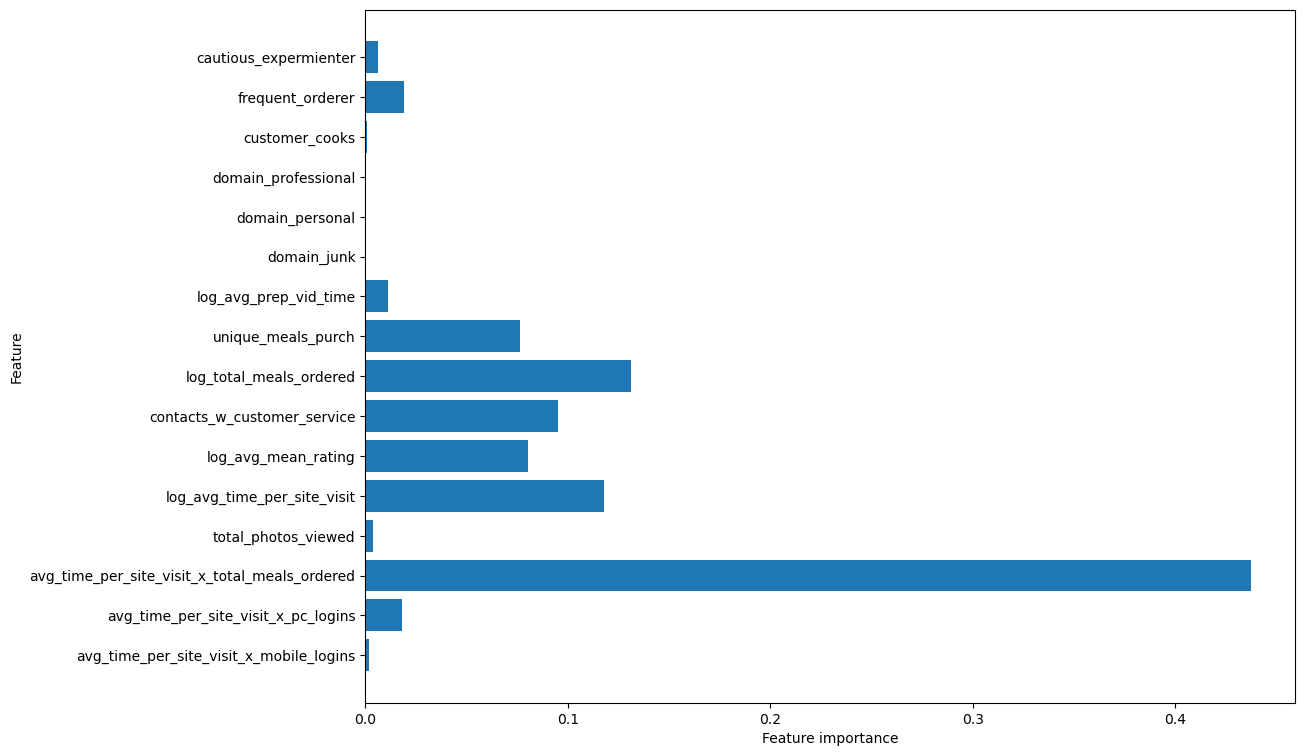

In [41]:
# plotting feature importance
plot_feature_importances(model,
                         train = x_train,
                         export = False)

Finally printing the result of the best model and the last model I ran

In [24]:
print(f"""
Best Current Model : {model_name}
Train_Score        : {model_train_score}
Test_Score         : {model_test_score}
Test_Train_Gap     : {model_gap}
""")


Best Current Model : Random Forest
Train_Score        : 0.8057
Test_Score         : 0.7763
Test_Train_Gap     : 0.0294

